# Real estate market research: a study of apartment sales advertisements
 

### Let's open the data file and examine the information. 

In [1]:
#library import
import pandas as pd
import matplotlib.pyplot as plt

#read the file and save it into a dataframe
data=pd.read_csv('real_estate_data.csv', sep= '\t')

Now we can open the general information about the table

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

And check the first 10 lines:

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


For visualization purposes, let's draw a histogram for each column in the table

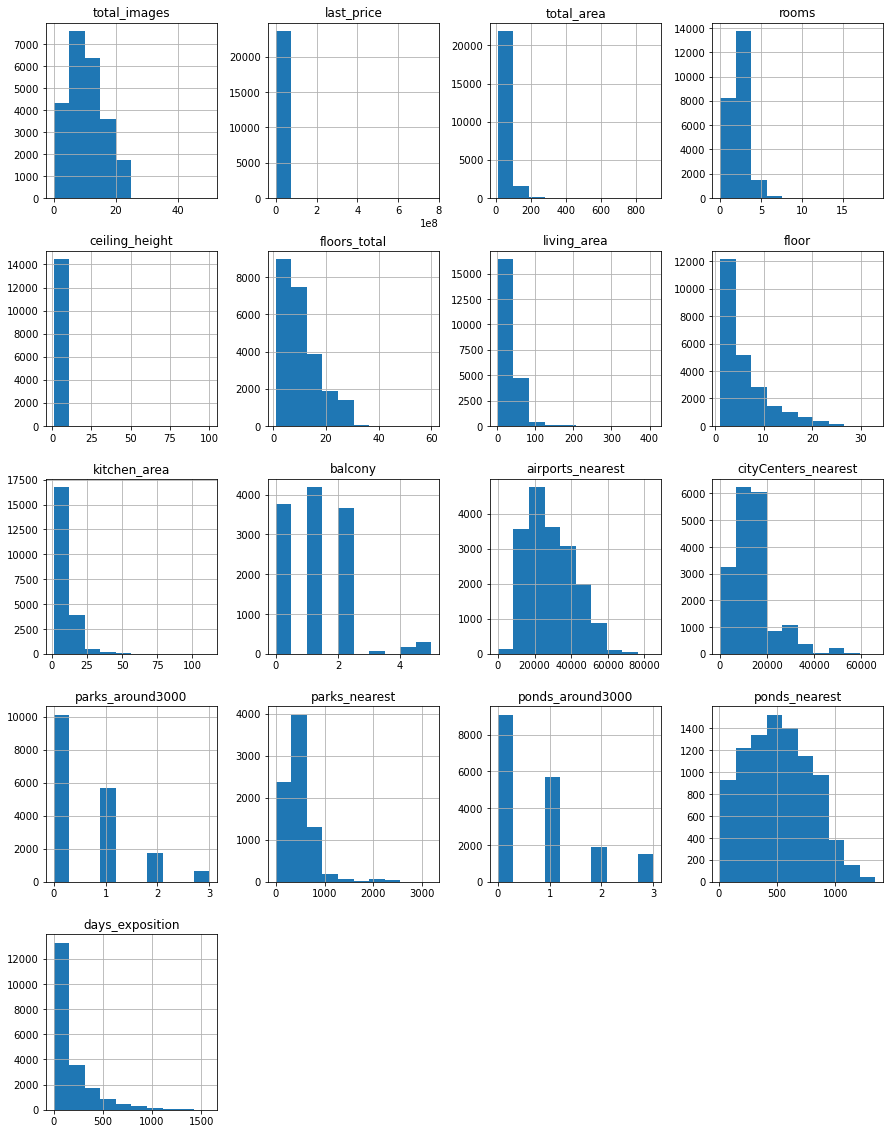

In [4]:
data.hist(figsize=(15, 20));

So, the dataset contains various data related to 23,699 real estate properties. In the majority of advertisements, there are up to 10 photos, and the area of the apartments is up to 100 square meters. An interesting observation regarding the distance to parks and bodies of water: potential residents will have to walk longer to reach the water compared to the parks. This is likely due to the fact that the area of parks is significantly larger than that of ponds and lakes.

## Preprocessing

Let's count the number of missing values in each column

In [5]:

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

There is no lack of missing values. Let's try to determine in which columns we can quickly fill in the missing values. The missing values in the `balcony` column likely indicate that there is no balcony in the apartment, as having a balcony is more of a plus than a minus. We will replace the missing values with 0. Empty values in the `days_exposition` column will be replaced with 0. It is likely that there was an error in calculating the number of days the advertisement was displayed in new listings (for example, less than 24 hours have passed since the publication). Missing boolean values in the `is_apartment` column can be replaced with False, as apartments (*`апартаменты`*) are still a rare type of property on the market, and hiding such information is not very productive. Where appropriate, we will change the data type from float to int. In our project, the property price will be in multiples of ten thousand rubles, and the distances to parks or ponds are defined with meter precision. The developers have not yet started offering apartments with one and a half kitchens.

Let's replace the missing values in the 'balcony' column with 0 and change the data type to int.

In [6]:
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

For the convenience of analysis, let's define that empty values in the `is_apartment` column are `False`

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)

It would be difficult to replace the missing values in the 'locality_name' column. It may require teaching the model to determine the name of the locality based on the distance to parks or bodies of water, but we have no opportunity to perform it in this work.

Please pay attention that the values in `locality_name` are given in Russian.

In [8]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

The developers have warned about implicit duplicates in this column - we need to check for them

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Let's correct the identified duplicates by standardizing the Russian names of the towns to ensure consistency.

In [10]:
data['locality_name'] = data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Аннино', 'посёлок Аннино')
data['locality_name'] = data['locality_name'].replace('городской посёлок Мга', 'посёлок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('село Павлово', 'посёлок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово', 'посёлок городского типа Павлово')

In `first_day_exposition` we can get rid of the precise timing (hours and minutes):

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

There are so many outliers in the 'ceiling_height' column that they even affect the median. This is interesting:

In [12]:
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Ceiling heights above 4 meters seem to be unrealistic, like true palaces. I don't think they exist! Let's divide these anomalous values (such as 15-25m) by 10.

In [13]:
for i in data['ceiling_height']:
    if i > 15:
        i= i/10

Now let's replace the missing values with the median since the range is not as large

In [14]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

print(data['ceiling_height'].head(5))

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64


In [15]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Let's search for the outliers again

In [16]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Since there are still many anomalies, let's replace them with the median value

In [17]:
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = data['ceiling_height'].median()

Are there still any gigantic ceilings remaining?

In [18]:
data[data['ceiling_height'] > 4].sort_values('ceiling_height').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Very good.

Now let's change the `last_price` values to the int type. In the real estate market, prices are not traded in fractions of a penny, and it's more pleasant to view whole numbers. Prices are given in Russian rubles.

In [19]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [20]:
data['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

Let's drop excessively expensive properties, listed higher than 99 million

In [21]:
data = data.query('last_price < 99000000')

he data in the `floors_total` column is undoubtedly important, as the second floor in a multi-story building and the second floor in a historic income property are completely different market offerings. However, it will be difficult to replace such values, so let's leave them as they are.

In [22]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


But we may drop the properties above the 30th floor: almost unbeliveable un Saint Petersburg.

In [23]:
data = data.query('floors_total<30')

In [24]:
#data = data.query('floor<30')

Indeed, the `living_area` parameter, which represents the living area, is a rather formal parameter and is unlikely to be as important as the `total area`

In [25]:
data['living_area'].value_counts()
data['living_area'].describe()

count    21678.000000
mean        34.248059
std         21.138051
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

In [26]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 347.5, 409. ,   nan])

Let's exclude the extremely large apartments from consideration by limiting the max sq footage and the number of rooms:

In [27]:
data = data.query('total_area < 150 and living_area < 100')
data = data.query('rooms < 9')

We have performed data preprocessing: we removed anomalies and dealt with missing values.

### Let's add new columns

In our opinion, for further analysis, several important features are missing. These include the price per square meter, the day of the week when the advertisement was posted, the categorized floor level of the apartment (whether it is the first, last, or not), and the accurate distance to the city center.

Let's add a column `meter_price` for the price per square meter of the property

In [29]:
data['meter_price']=data['last_price'] / data['total_area']
data['meter_price'].head(5)

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: meter_price, dtype: float64

And check the highest price

In [30]:
data['meter_price'].max()

721518.9873417722

Let's add a `week_day` column for the day of the week when the advertisement was posted, where the value 1 represents Monday, 2 represents Tuesday, and so on.

In [31]:
data['week_day']=data['first_day_exposition'].dt.weekday
data['week_day'].head(5)


0    3
1    1
2    3
4    1
5    0
Name: week_day, dtype: int64

Same for the listing `year`:

In [32]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head(5)


0    2019
1    2018
2    2015
4    2018
5    2018
Name: year, dtype: int64

And `month`:

In [33]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head(5)


0     3
1    12
2     8
4     6
5     9
Name: month, dtype: int64

Now let's add a column with the categorized floor level of the apartment. For convenience, let's create a function  `floor_categorizer`

In [34]:
def floor_categorizer(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'else'
# add a new column
data['floor_category'] = data.apply(floor_categorizer, axis = 1)

In [35]:
data['floor_category'].head(5)

0     else
1    first
2     else
4     else
5     else
Name: floor_category, dtype: object

Let's convert the distance to the city center from meters to kilometers and save it in a separate column

In [36]:
data['center_km']=data['cityCenters_nearest'].div(1000).round(0)
data['center_km'].head(5)

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: center_km, dtype: float64

## Exploratory data analysis

Let's examine the following parameters of the properties:

- Total area
- Living area
- Kitchen area
- Price of the property
- Number of rooms
- Ceiling height
- Floor level
- Type of floor (‘first,’ ‘last,’ ‘other’)
- Total number of floors in the building
- Distance to the city center in meters
- Distance to the nearest airport
- Distance to the nearest park
- Day and month of the advertisement publication

count    21167.000000
mean        56.288911
std         22.499598
min         12.000000
25%         40.000000
50%         51.000000
75%         67.400000
max        149.600000
Name: total_area, dtype: float64

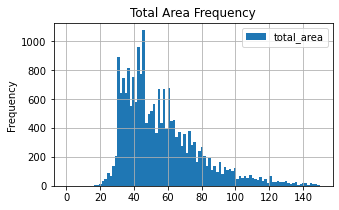

In [37]:
data
data.plot(y = 'total_area', kind = 'hist', bins = 100,title='Total Area Frequency', grid=True, figsize = (5,3), range = (0,150))
data['total_area'].describe()


The distribution of the data is close to normal, with a noticeable tail towards larger apartments (above 100 square meters). The average area is 56 square meters, and the median is 51 square meters, indicating that the tail did not significantly affect the overall results. We will remember these parameters as they will be useful for further analysis.

Now what about the living area?

count    21167.000000
mean        32.190662
std         15.095350
min          2.000000
25%         18.500000
50%         30.000000
75%         41.500000
max         99.700000
Name: living_area, dtype: float64

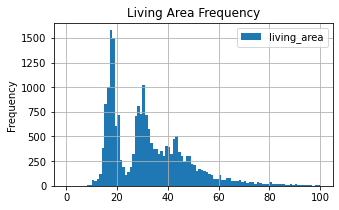

In [38]:
data
data.plot(y = 'living_area', kind = 'hist', bins = 100, title='Living Area Frequency', grid=True, figsize = (5,3), range = (0,100))
data['living_area'].describe()


There is a significant outlier at 20 and 30 square meters, while the rest of the distribution appears to be normal. It is evident that the outlier is likely due to realtors filling in the field based on their own perception of the ratio between total and living area, without referring to the normative documents

Now we're getting hungry, let's get closer to the kitchen:

count    20389.000000
mean        10.124692
std          4.840524
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         93.000000
Name: kitchen_area, dtype: float64

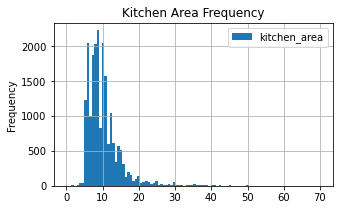

In [39]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100,title='Kitchen Area Frequency', grid=True, figsize = (5,3), range = (0,70))
data['kitchen_area'].describe()


Kitchen areas in St. Petersburg are not large, around 9 square meters. The distribution of data is normal, indicating that the kitchen area is not a negligible parameter when choosing housing. Therefore, it is filled in quite conscientiously.

Now let's fet back to the floor and the number of rooms in each listing:

count    21167.000000
mean         5.873955
std          4.844222
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

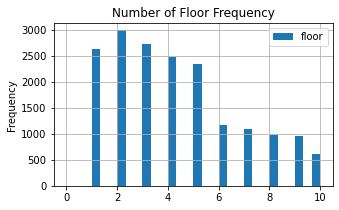

In [40]:

data.plot(y = 'floor', kind = 'hist', bins = 30, title = 'Number of Floor Frequency', grid=True, figsize = (5,3), range = (0,10))
data['floor'].describe()


count    21167.000000
mean         1.997165
std          0.942148
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

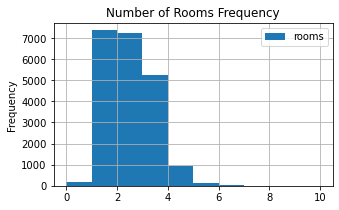

In [41]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, title='Number of Rooms Frequency', grid=True, figsize = (5,3), range = (0,10))
data['rooms'].describe()

Now let's check the ceiling heights:

count    21167.000000
mean         2.685729
std          0.194267
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

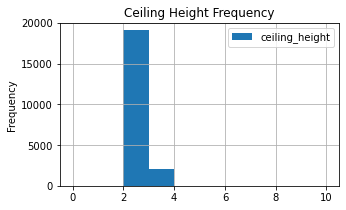

In [42]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10,title='Ceiling Height Frequency', grid=True, figsize = (5,3), range = (0,10))
data['ceiling_height'].describe() 

When it comes to ceiling heights in St. Petersburg, things are quite good. The average ceiling height is 268 cm, which is spacious, although the histogram may not be visually informative. As a reminder, we removed the anomalies with ceiling heights of 20-30 meters, and it was a justified decision.

Now let's apply the same procedure for the `last price`. 

count    2.116700e+04
mean     5.654087e+06
std      4.292394e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.599000e+06
75%      6.500000e+06
max      8.500000e+07
Name: last_price, dtype: float64

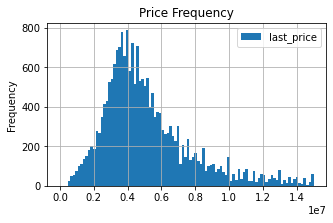

In [43]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, title='Price Frequency',grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

The distribution of prices is close to normal, with a noticeable tail towards higher prices, which is expected considering the distribution of area. The average price of an apartment in the St. Petersburg region is 5.6 million rubles, indicating that the price has been significantly influenced by outliers. It is likely that larger apartments are sold at considerably higher prices, suggesting that the price increase is slightly steeper than expected

Now let's apply the same procedure for the floor. 

count    21167.000000
mean         5.873955
std          4.844222
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

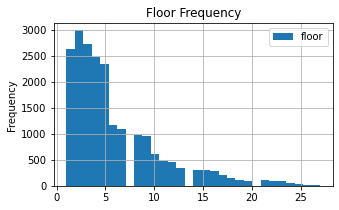

In [44]:
data.plot(y = 'floor', kind = 'hist', bins = 30, title='Floor Frequency', grid=True, figsize = (5,3))
data['floor'].describe()

It's an interesting distribution. 

The low-rise buildings in the center have resulted in a relatively low median and mean (4th and 5th floors). Now we can take a look at the `floor_category` distribution&.

In [45]:
data['floor_category'].describe()

count     21167
unique        3
top        else
freq      15592
Name: floor_category, dtype: object

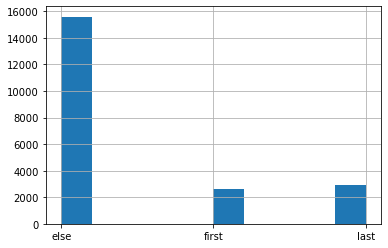

In [46]:
data['floor_category'].hist();

It is evident that the majority of apartments are not located on the "critical" first or last floors. Quite expected.

What about the height of the building?

count    21167.000000
mean        10.686871
std          6.519679
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

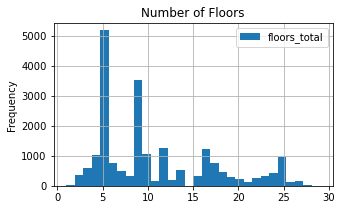

In [47]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, title='Number of Floors' ,grid=True, figsize = (5,3))
data['floors_total'].describe()

The distribution of data is far from normal, but it is not difficult to explain: the city has a high percentage of historical low-rise buildings (up to 5 floors), while new microdistricts with heights of 10 floors or more are also actively being constructed. However, the median floor count is 9, and the mean is close to 11.

Now let's look closer at the distance to the city center:

count    16289.000000
mean     14447.811222
std       8623.553660
min        208.000000
25%       9743.000000
50%      13229.000000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

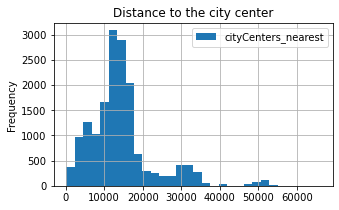

In [48]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, title='Distance to the city center',grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()

"The distribution is close to normal, with an interesting tail towards the outskirts: there is an increase in listings in new areas beyond the KAD ring road and in neighboring cities.

Now, what about the distance to Pulkovo airport?

count    16271.000000
mean     28842.576056
std      12763.387719
min          0.000000
25%      18398.000000
50%      26902.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

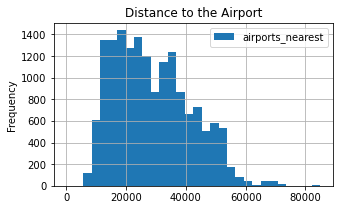

In [49]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, title='Distance to the Airport', grid=True, figsize = (5,3))
data['airports_nearest'].describe()

It's hard to say how important the exact distance from the airport to future housing is for clients, especially in meters. However, let's look at the data: the median value is 26 km, and the mean is almost 29 km.

What I expect to matter, is the distance to the nearest park.

count    7113.000000
mean      490.585969
std       338.769247
min         1.000000
25%       288.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

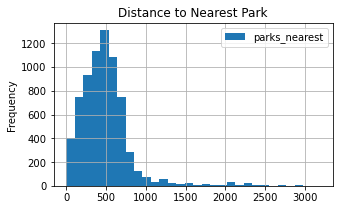

In [50]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30,title='Distance to Nearest Park', grid=True, figsize = (5,3))
data['parks_nearest'].describe()

St. Petersburg is not lacking in green areas: on average, it takes about 6 minutes or 490 meters to reach the nearest park.

Now, let's get closer to the publication day:

count    21167.000000
mean         2.551377
std          1.783070
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

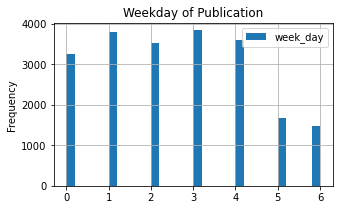

In [51]:
data.plot(y = 'week_day', kind = 'hist', bins = 30, title='Weekday of Publication', grid=True, figsize = (5,3))
data['week_day'].describe()

Interesting observation, the median of publications falls on Wednesday: the middle of the week, which might make one think about moving.

What about the month?

count    21167.000000
mean         6.421222
std          3.465263
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

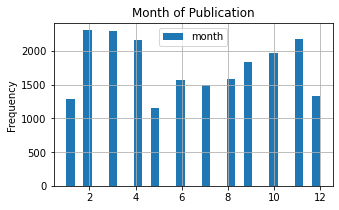

In [52]:
data.plot(y = 'month', kind = 'hist', bins = 30, title='Month of Publication', grid=True, figsize = (5,3))
data['month'].describe()

Based on the month of publication, we observe a decrease in listings in January, December, and May, while the number of listings remains stable during the summer and increases in the fall. .

Let's see how quickly the apartments were sold in our dataset. The "days_exposition" column indicates how many days each listing was published.

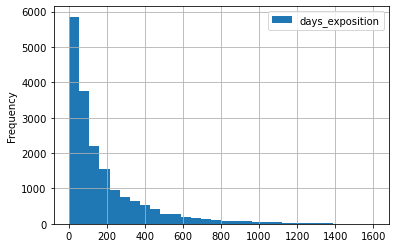

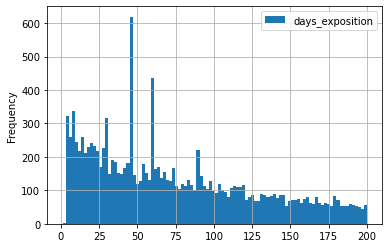

In [53]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600));
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200));

he significant outliers at 45, 60, and 90 days are likely related to the platform's standard practices. It's common for listings to be automatically removed from publication after a certain period of time if they haven't been sold or renewed. These outliers can be considered as cases where the listings were not sold within the specified time frame and were consequently taken down from the platform.

Let's obtain the mean, median, and interquartile range, excluding listings that were removed immediately.

In [54]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    18332.000000
mean       182.007037
std        218.689553
min          1.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Based on the obtained information, it is easy to assume that the median and mean values are slightly inflated. However, the values of 45 and 90 days in the first and third quartiles look reasonable. It is possible to exclude these values from the dataset, but I consider it impractical for two reasons:

- Automatic delisting can indicate both a successful sale and an unsuccessful transaction. In either case, the author is evidently not interested in extending the listing.
- Delisting, whether manual or automatic, does not necessarily imply a completed sale.

Will this affect the average *selling speed*? Yes, but removing the data would introduce another small distortion. Thus, it can be said that apartments are sold at a relatively uniform pace, and a transaction completed within three months can be considered successful and relatively quick. It would be interesting to clarify with the platform developers how many authors of listings confirm a successful transaction when removing the publication.

To assess the impact of various factors on housing prices in our data, we can analyze the role of the following variables: total area, living area, kitchen area, number of rooms, floor level (whether it is the first, last, or other), and the date of publication (day of the week, month, year).

Price and total area:

,mean,count,median
total_area,,,
145.70,8.500000e+07,1,85000000.0
127.50,4.346667e+07,3,59000000.0
147.20,5.710000e+07,2,57100000.0
145.90,5.400000e+07,1,54000000.0
131.10,4.824600e+07,3,50000000.0
...,...,...,...
29.62,1.300000e+06,1,1300000.0
14.00,1.190000e+06,1,1190000.0
28.60,2.034000e+06,5,1060000.0


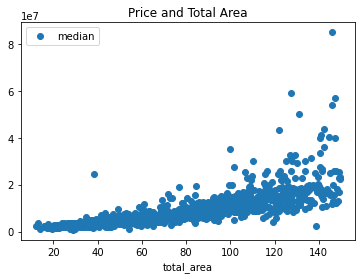

In [55]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', title='Price and Total Area')

pivot_table_total_area.sort_values('median', ascending = False)

And check the correlation coefficient

In [56]:
data['total_area'].corr(data['last_price'])

0.7108895093231532

So, there is a dependency: the larger the area, the higher the price. Well, it's logical, but in the case of price per square meter, the correlation would be weaker. Let's take a look at the living area (while keeping in mind the missing values).

,mean,count,median
living_area,,,
87.23,85000000.0,1,85000000.0
78.50,82000000.0,1,82000000.0
74.30,63900000.0,1,63900000.0
65.93,47700000.0,1,47700000.0
83.50,45900000.0,1,45900000.0
...,...,...,...
16.31,1700000.0,1,1700000.0
18.11,1695000.0,2,1695000.0
12.81,1690715.0,1,1690715.0


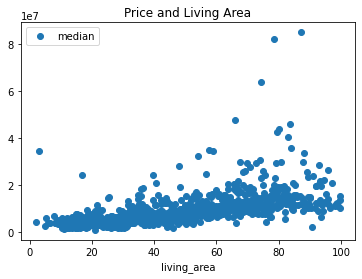

In [57]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o', title='Price and Living Area')

pivot_table_living_area.sort_values('median', ascending = False)

In [58]:
#correlation coefficient
data['living_area'].corr(data['last_price'])

0.5830897147214669

There is less data available, but the dependency is evident: the larger the area, the higher the price.
Now let's move on to the kitchen area:

,mean,count,median
kitchen_area,,,
20.31,85000000.0,1,85000000.0
93.00,65850000.0,1,65850000.0
41.90,52000000.0,1,52000000.0
12.89,42738000.0,1,42738000.0
49.20,39900000.0,1,39900000.0
...,...,...,...
4.40,1800000.0,2,1800000.0
6.22,1720000.0,1,1720000.0
6.73,1718857.0,1,1718857.0


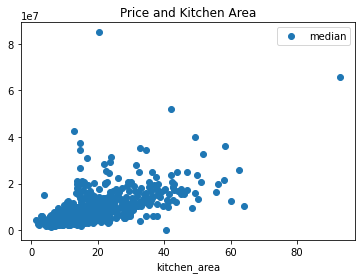

In [59]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o', title='Price and Kitchen Area')

pivot_table_kitchen_area.sort_values('median', ascending = False)

In [60]:
#correlation coefficient
data['kitchen_area'].corr(data['last_price'])

0.5448026090253514

Outliers are noticeable but relatively few, and the dependency is still evident. Let's now look at the number of rooms and the price in the listings:

,mean,count,median
rooms,,,
7,1.825000e+07,4,18500000
6,1.098112e+07,17,10500000
5,1.056309e+07,150,10350000
4,9.648745e+06,928,8200000
3,7.620105e+06,5268,6100000
2,5.532800e+06,7260,4790000
1,3.808501e+06,7358,3600000
0,3.011493e+06,182,2700000


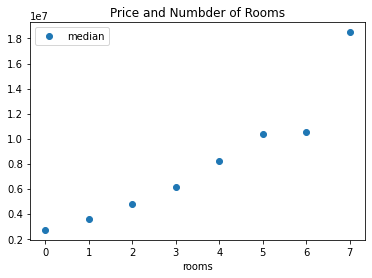

In [61]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median', style = 'o', title='Price and Numbder of Rooms')
pivot_table_rooms.sort_values('median', ascending = False)

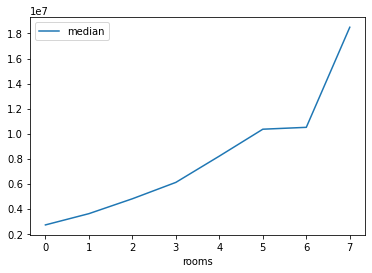

In [62]:
#сделаем понагляднее
pivot_table_rooms.plot(y = 'median');

In [63]:
#correlation coefficient 
data['rooms'].corr(data['last_price'])

0.4104829306647606

An interesting observation indeed: the proportion of expensive apartments with 4 rooms is very high. It's likely that the market is structured in such a way that expensive new developments have a significant number of four-room apartments. Now, let's examine how the floor affects the price.

,mean,count,median
floor,,,
18,5.848517e+06,156,5415000
22,6.189973e+06,101,5350000
13,6.243852e+06,334,5310000
23,6.035469e+06,88,5225000
16,5.898521e+06,286,5200000
21,6.374945e+06,115,5150000
24,5.963356e+06,54,5137500
11,6.068094e+06,473,5100000
12,6.068311e+06,467,5100000


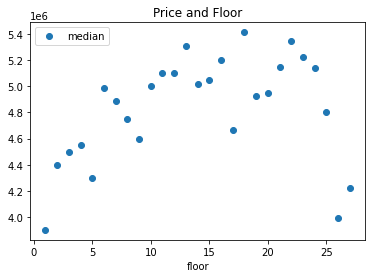

In [64]:
pivot_table_floor = data.pivot_table(index = 'floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median', style = 'o', title='Price and Floor')

pivot_table_floor.sort_values('median', ascending = False)

In [65]:
#correlation coefficient 
data['floor'].corr(data['last_price'])

0.06420366118335644

There is no significant dependency observed based on the floor number alone, which is not surprising. A fifth-floor apartment is unlikely to be significantly different from a fourth or sixth-floor apartment. However, it would be more interesting to examine the categories of floor types. Let's take a look at that.

,mean,count,median
floor_category,,,
else,5.910205e+06,15592,4780000.0
first,4.504649e+06,2633,3900000.0
last,5.325427e+06,2942,4208616.5


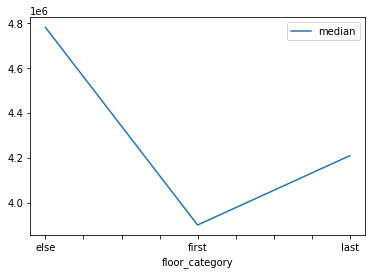

In [66]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Now let's elimenate `else` cayegory

,mean,count,median
floor_category,,,
first,4.504649e+06,2633,3900000.0
last,5.325427e+06,2942,4208616.5


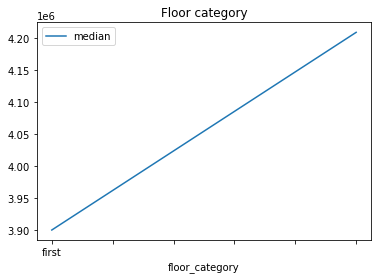

In [67]:
pivot_table_floor_category = data.query('floor_category != "else"').pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median', title = 'Floor category')
pivot_table_floor_category

and the weekday:

,mean,count,median
week_day,,,
1,5.663948e+06,3789,4650000
2,5.637276e+06,3532,4635000
0,5.688415e+06,3255,4600000
3,5.836010e+06,3837,4600000
4,5.617196e+06,3600,4500000
5,5.449455e+06,1683,4500000
6,5.442963e+06,1471,4500000


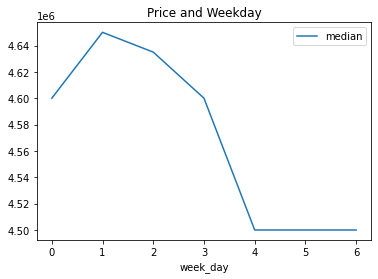

In [68]:
 pivot_table_weekday = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median', title='Price and Weekday')

pivot_table_weekday.sort_values('median', ascending = False)

Не вижу существенной зависимости, но объявления, поданные в понедельник и вторник предлагают более высокие цены объекта, возможно, ответственные агенты делают свою раюоту в начале недели.
There doesn't seem to be a strong correlation between the day of the week and the listing prices. The differences in median prices across different days of the week are relatively small. However, it's worth noting that there is a slight increase in prices on Mondays.

What about month?

,mean,count,median
month,,,
4,5.706865e+06,2159,4750000
12,5.937726e+06,1334,4700000
1,5.839242e+06,1289,4600000
2,5.659685e+06,2304,4600000
3,5.576040e+06,2295,4600000
9,5.683595e+06,1832,4600000
11,5.650567e+06,2184,4600000
7,5.579032e+06,1496,4500000
8,5.763981e+06,1579,4500000


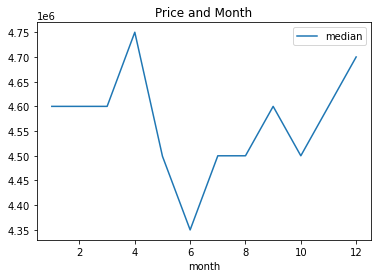

In [69]:
pivot_table_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median', title='Price and Month')

pivot_table_month.sort_values('median', ascending = False)

It is cheaper to buy a flat in the summer; our data clearly indicates a significant price decrease in June. Now let's take a look at the historical perspective and examine the relationship between the price and the year of publication.

,mean,count,median
year,,,
2014,9.585368e+06,119,7100000
2015,6.528311e+06,1053,5100000
2019,6.000875e+06,2621,5000000
2018,5.481271e+06,7375,4550000
2017,5.496330e+06,7424,4445000
2016,5.711715e+06,2575,4400000


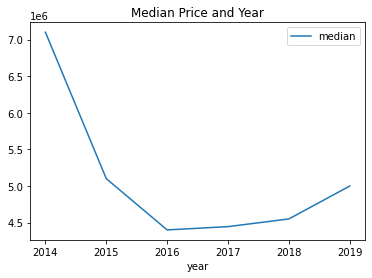

In [70]:
pivot_table_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median', title='Median Price and Year')

pivot_table_year.sort_values('median', ascending = False)

The trend is quite clear.

Let's count the sq. meter price in the most popular locations. 

Please note, the localities are named in Russian. 

In [71]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,13991,111634.519240
посёлок Мурино,461,86365.639394
посёлок Шушары,403,78749.640577
Всеволожск,371,68880.131023
Пушкин,336,103354.012081
Колпино,327,75249.775385
посёлок Парголово,301,90442.587023
Гатчина,291,68681.168503
деревня Кудрово,262,92702.184418


Now we'll find the cheepest and the most expensive locations:

In [72]:
#highest
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,13991,111634.51924


Saint Petersburg

In [73]:
#lowest
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Гатчина,291,68681.168503


Gatchina

The most expensive real estate is in St. Petersburg, while the cheapest is in Vyborg. Now let's examine how proximity to the center of St. Petersburg affects the price per square meter.

In [74]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'center_km', values = 'meter_price', aggfunc = 'mean')
pivot_table_km

,meter_price
center_km,
0.0,235111.585413
1.0,139280.237738
2.0,145771.848096
3.0,120764.571542
4.0,126804.932828
5.0,133627.097598
6.0,141281.305142
7.0,146000.454075
8.0,122805.347720


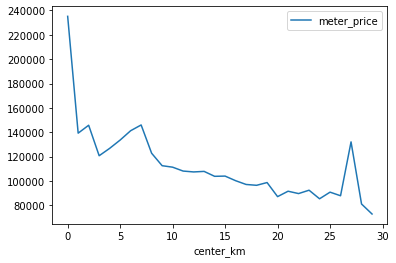

In [75]:
pivot_table_km.plot();


Very interesting data. Undoubtedly, the city center is always more expensive than the outskirts, but it is evident that some districts located on the periphery are filled with higher-priced properties. That effectively means that the city center can be limited by 8 km radial distance. 

### General Conclusion


During the implementation of this project, we processed a large dataset related to real estate sales in the Saint Petersburg region. We worked with missing data, tried to understand their nature, and made necessary changes to data types and added new columns.

- We carefully examined the following parameters: total area, living area, kitchen area, price, number of rooms, ceiling height, distance to the city center and airport, and proximity to water and parks. Anomalies in these parameters were identified.
- The average apartment on the market is a two-room apartment of less than 60 square meters, priced at around 5.6 million rubles, with high ceilings, located in a low-rise building (up to 6 floors), within walking distance to a park.
- We found that the area primarily affects the housing price. The number of rooms and proximity to the city center also showed a significant influence on the price. However, we understand that we only analyzed pairwise correlations: area-price, distance to park-price, and so on. It is difficult to determine which specific parameter has the most significant impact on the price. The selling process for apartments is generally lengthy, and selling a property within 90 days is considered fortunate. However, it is worth noting that delisting an advertisement on the web-site does not necessarily indicate a successful transaction. The author may simply forget about the listing, regardless of whether the apartment was sold or not. This limitation significantly affects the validity of our conclusions.




